## DSF LAB PROJECT
### Group members :
1. USMAN MAJEED  ( FA23-BDS-042)
2. MUHAMMAD SAAD UMAR  ( FA23-BDS-054)
3. NAZIR AHMED  ( FA23-BDS-032)                    

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , mean_squared_error, r2_score
%matplotlib inline

In [159]:
from sklearn.tree import DecisionTreeRegressor

#### 2. **Data Loading and exploration and cleaning**


In [160]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [161]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

- Let's have a look on the shape of the dataset

In [162]:
df.shape

(10841, 13)

- Not enough, let's have a look on the columns and their data types using detailed info function

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# **Observations**
---
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - `'Size', 'Installs', 'Price'` 

In [164]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


## Observations:
---
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

- Let's clean the `Size` column first

In [165]:
# check for null values
df['Size'].isnull().sum()

0

In [166]:
# check unique values
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [167]:
# find the values in size column which has 'M' in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [168]:
# find the values in size column which has 'k' in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [169]:
# find the values in size column which has 'Varies with device' in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [170]:
# Total Values in Size column
df['Size'].value_counts().sum()

10841

In [171]:

def convert_size(size):
    # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
    '''
    

    
    if 'k' in size:
        return float(size.replace('k', '')) * 1024
    elif 'M' in size:
        return float(size.replace('M', '')) * 1024 * 1024
    elif 'Varies with device' in size:
        return np.nan
    return size

df['Size'] = df['Size'].map(convert_size)



In [172]:
df['Size'].unique()

array([1.99229440e+07, 1.46800640e+07, 9.12261120e+06, 2.62144000e+07,
       2.93601280e+06, 5.87202560e+06, 3.04087040e+07, 3.46030080e+07,
       3.25058560e+06, 2.93601280e+07, 1.25829120e+07, 2.09715200e+07,
       2.20200960e+07, 3.87973120e+07, 2.83115520e+06, 5.76716800e+06,
       1.78257920e+07, 4.08944640e+07, 3.25058560e+07, 4.40401920e+06,
       7.34003200e+06, 2.41172480e+07, 6.29145600e+06, 6.39631360e+06,
       4.82344960e+06, 9.64689920e+06, 5.45259520e+06, 1.15343360e+07,
       2.51658240e+07,            nan, 9.85661440e+06, 1.57286400e+07,
       1.04857600e+07, 1.25829120e+06, 2.72629760e+07, 8.38860800e+06,
       8.28375040e+06, 5.87202560e+07, 5.97688320e+07, 3.67001600e+07,
       5.66231040e+07, 2.05824000e+05, 3.77487360e+06, 5.97688320e+06,
       9.01775360e+06, 2.51658240e+06, 2.83115520e+07, 2.62144000e+06,
       1.67772160e+07, 3.56515840e+06, 9.33232640e+06, 4.08944640e+06,
       3.04087040e+06, 3.98458880e+07, 3.35544320e+07, 5.66231040e+06,
      

In [173]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [174]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [175]:
# making a new column called 'Size in Mb' which will have the size in MB
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

- Now we have converted every value into bytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

---
- Let's have a look on the `Installs` column

In [176]:
# check the unique values in size column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', '1000+'], dtype=object)

In [177]:
# let's have a values counts
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
1000+                1
Name: count, dtype: int64

In [178]:
# find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

10840

In [179]:
# Total values in Installs column
df['Installs'].value_counts().sum()

10841

In [180]:
# remove the plus sign from install column and convert it to numeric
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
# also remove the commas from the install column
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
# convert the install column to numeric (integers because this is the number of installs/count)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [181]:
df.head() # check the head of the dataframe

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [182]:
df['Installs'].dtype # this will show the data type of the column

dtype('int64')

In [183]:
df['Installs'].max() # this will show the value counts of the column

1000000000

In [184]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['very_low', 'low', 'medium', 'medium_high', 'high', 'very_high', 'extremely_high', 'top_notch']
df['Installs_category'] = pd.cut((df['Installs']) ,  bins= bins , labels= labels )

In [185]:
df['Installs_category'].value_counts()

Installs_category
medium            2162
very_high         2118
extremely_high    2004
high              1648
medium_high       1531
top_notch          828
low                535
very_low            15
Name: count, dtype: int64

In [186]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [187]:
df['Price'].value_counts()

Price
0         10041
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [188]:
df['Price'].isnull().sum()

0

In [189]:
df['Price'].loc[df['Price'].str.contains("\$")].value_counts().sum()

800

In [190]:
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()


10041

In [191]:
# THe written below expression will remove all the "$" signs from the column. 

df['Price'] = df['Price'].apply(lambda x : x.replace("$" , "") if "$" in str(x) else x)

# THe written below expression will convert the datatype of the column into float

df['Price'] = df['Price'].apply(lambda x : float(x))

In [192]:
df['Price'].dtype

dtype('float64')

## **This expression will plot the missing values in the dataset using the heatmap.**


<Axes: >

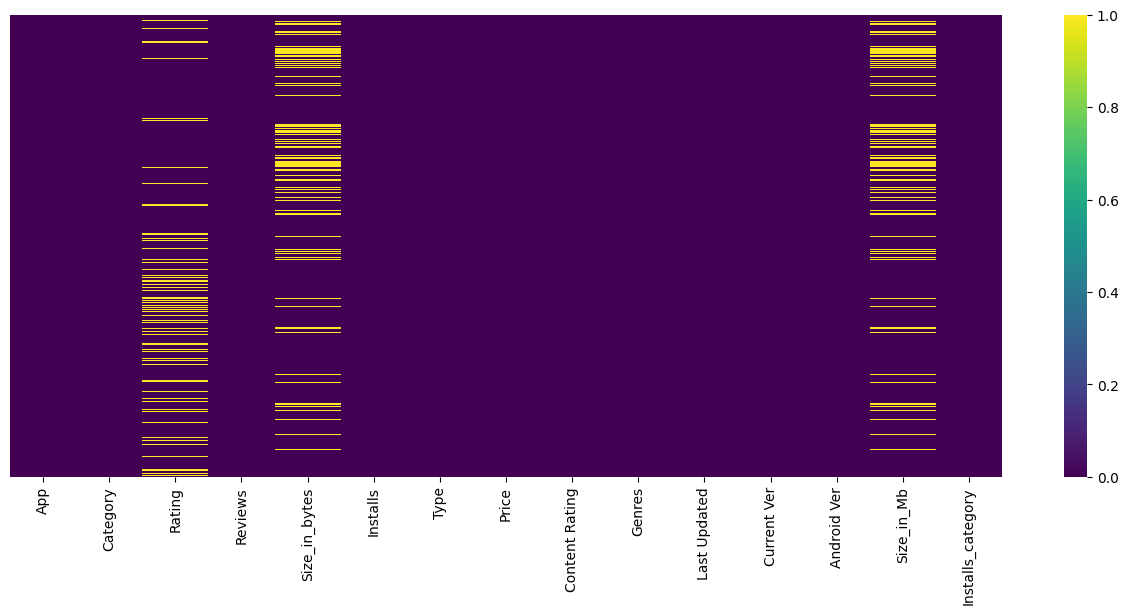

In [193]:

plt.figure(figsize = (16,6))

sns.heatmap(data = df.isnull() , yticklabels = False , cbar = True , cmap = 'viridis' )


## **Plotting the percentage null values in each column of the data.**

In [194]:
df.isnull().sum()

App                     0
Category                0
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          1
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1695
Installs_category       0
dtype: int64

In [195]:
percentage_null = df.isnull().sum() / len(df) * 100
percentage_null

App                   0.000000
Category              0.000000
Rating               13.596532
Reviews               0.000000
Size_in_bytes        15.635089
Installs              0.000000
Type                  0.009224
Price                 0.000000
Content Rating        0.009224
Genres                0.000000
Last Updated          0.000000
Current Ver           0.073794
Android Ver           0.018448
Size_in_Mb           15.635089
Installs_category     0.000000
dtype: float64

Text(0.5, 1.0, 'Percentageof NULL values in dataFrame.')

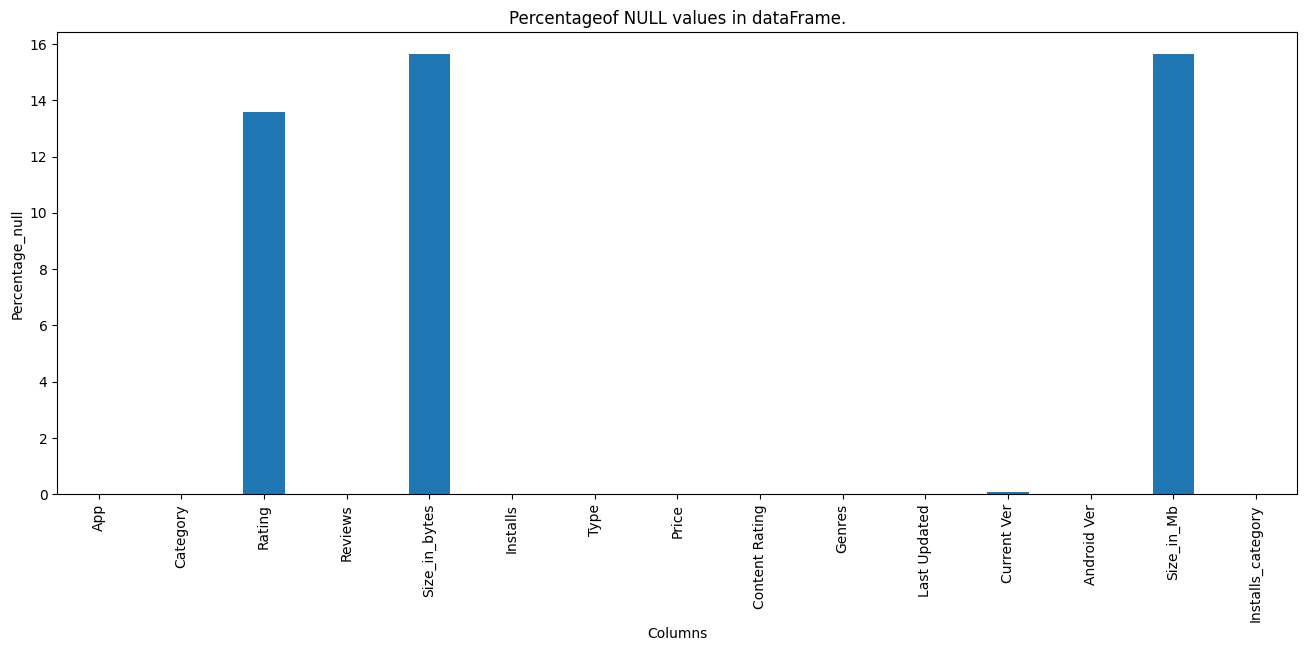

In [196]:
# make the figure size.
plt.figure(figsize = (16 , 6))

# Let's count the percentage of null values in the dataFrame.


percentage_null.plot(kind = 'bar')

# NOw we have to add the labels.

plt.xlabel("Columns")
plt.ylabel("Percentage_null")
plt.title("Percentageof NULL values in dataFrame.")


## **3. Insights from Data**

## **3.1. Which category has the highest number of apps?**

In [197]:
# which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps

Category
FAMILY             1972
GAME               1144
TOOLS               843
MEDICAL             463
BUSINESS            460
PRODUCTIVITY        424
PERSONALIZATION     392
COMMUNICATION       387
SPORTS              384
LIFESTYLE           382
Name: count, dtype: int64

# **3.2. Which category has the highest number of installs?**

In [198]:
# category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  35086024415
COMMUNICATION         32647276251
PRODUCTIVITY          14176091369
SOCIAL                14069867902
TOOLS                 11452771915
FAMILY                10258263505
PHOTOGRAPHY           10088247655
NEWS_AND_MAGAZINES     7496317760
TRAVEL_AND_LOCAL       6868887146
VIDEO_PLAYERS          6222002720
Name: Installs, dtype: int64

# **3.3. Which category has the highest number of reviews?**

In [199]:
# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1585422349
COMMUNICATION       815462260
SOCIAL              621241422
FAMILY              410226330
TOOLS               273185044
PHOTOGRAPHY         213516650
SHOPPING            115041222
PRODUCTIVITY        114116975
VIDEO_PLAYERS       110380188
PERSONALIZATION      89346140
Name: Reviews, dtype: int64

# **3.4. Which category has the highest rating?**

In [200]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
Name: Rating, dtype: float64

### **We will now visualize that under whoch part the rating lies the most.**

C:\Users\Saad\AppData\Local\Temp\ipykernel_2636\2564065887.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot


<Axes: xlabel='Rating', ylabel='Density'>

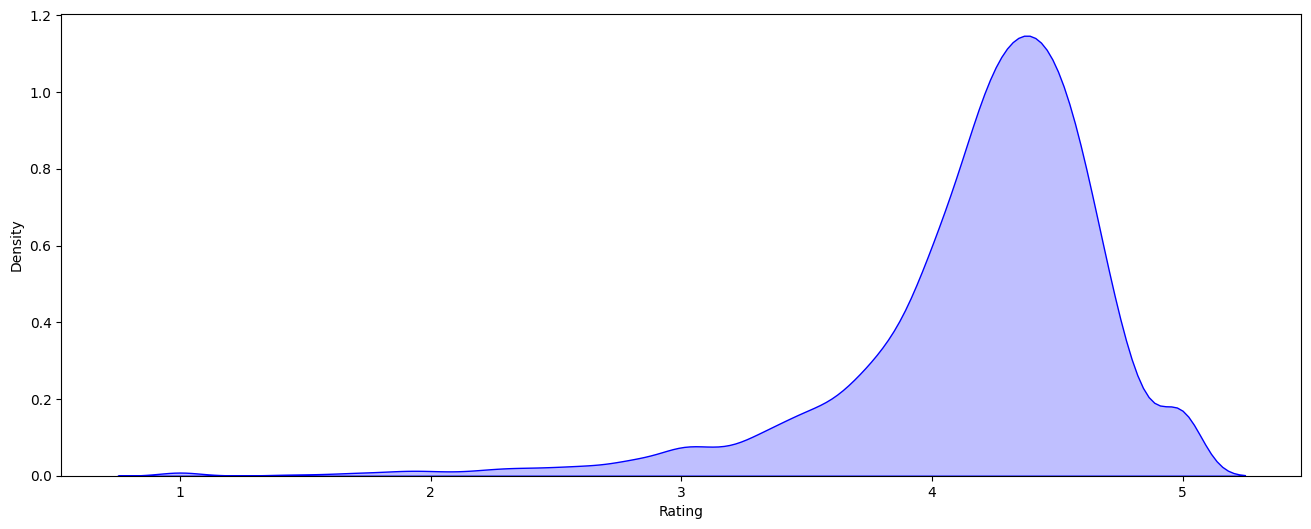

In [201]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot

#### **plot number of installs for free vs paid apps make a bar plot**

<Axes: xlabel='Type', ylabel='Installs'>

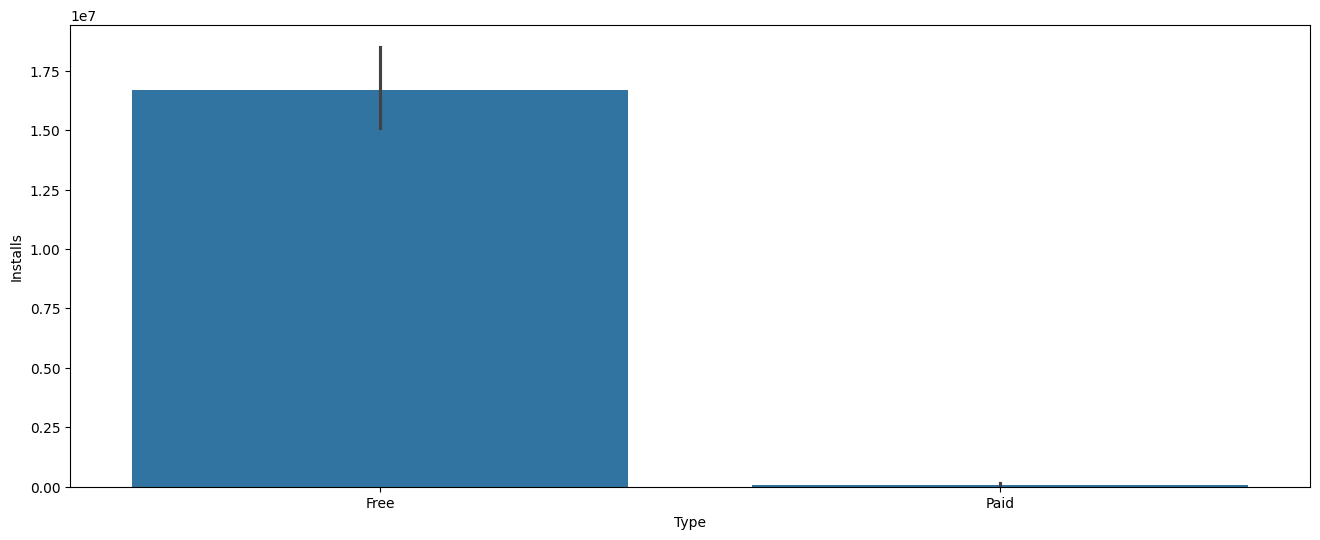

In [202]:
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Type', y='Installs', data=df) # plot the bar plot


### **show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type**


<Axes: xlabel='Installs', ylabel='Price'>

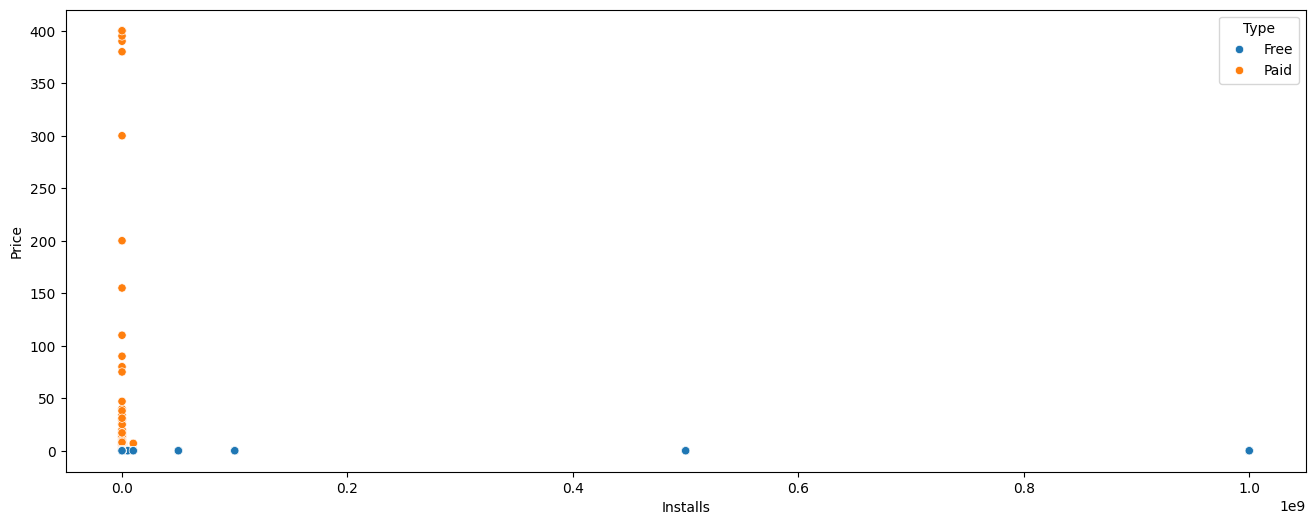

In [203]:
# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df) # plot the scatter plot

### **make a bar plot of Size_in_Mb vs Installs_category**


<Axes: xlabel='Installs_category', ylabel='Size_in_Mb'>

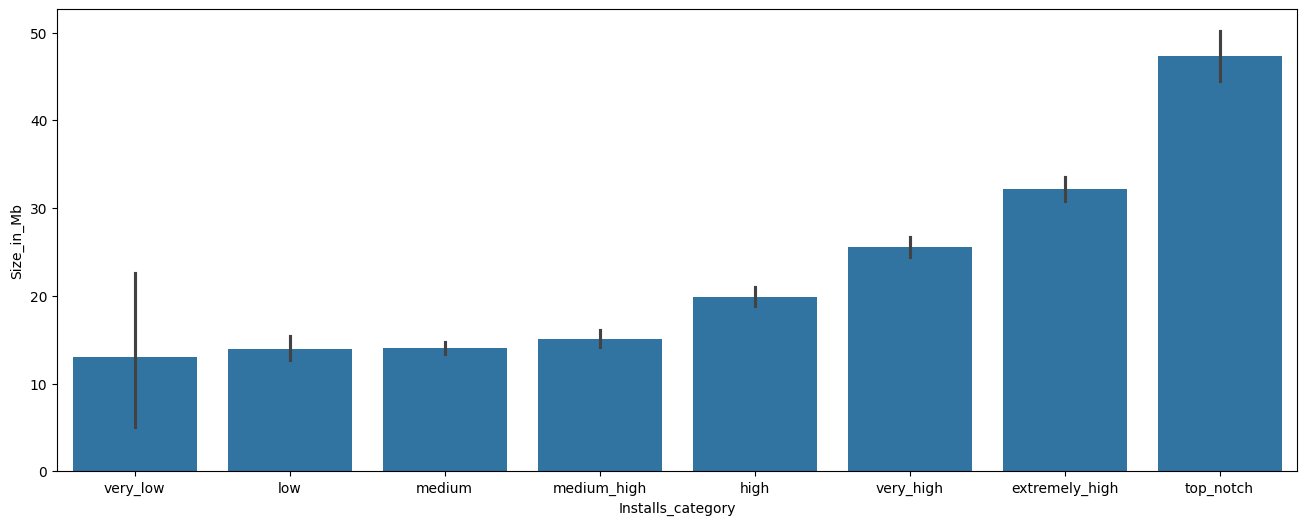

In [204]:
# Check if there is any impact of size on installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Installs_category', y='Size_in_Mb', data=df) # plot the bar plot

## **this will show the value counts of each content rating**

In [205]:
df['Content Rating'].value_counts() 

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

## **plot top 5 rated paid apps**


<Axes: xlabel='App', ylabel='Rating'>

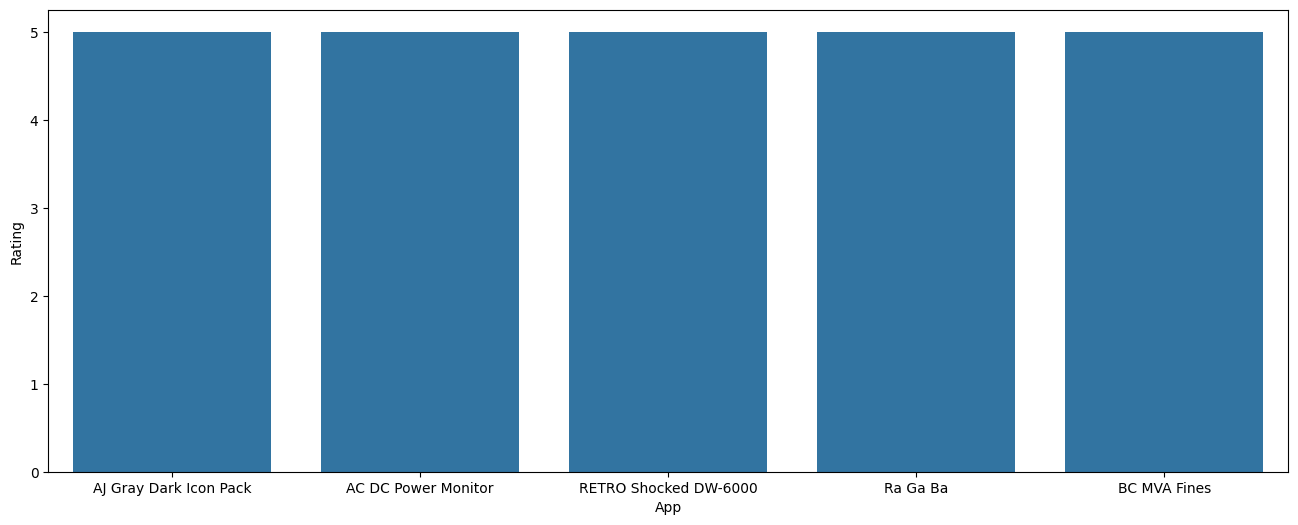

In [206]:
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

## **Plot top 5 Paid apps with highest number of reviews**


<Axes: xlabel='App', ylabel='Reviews'>

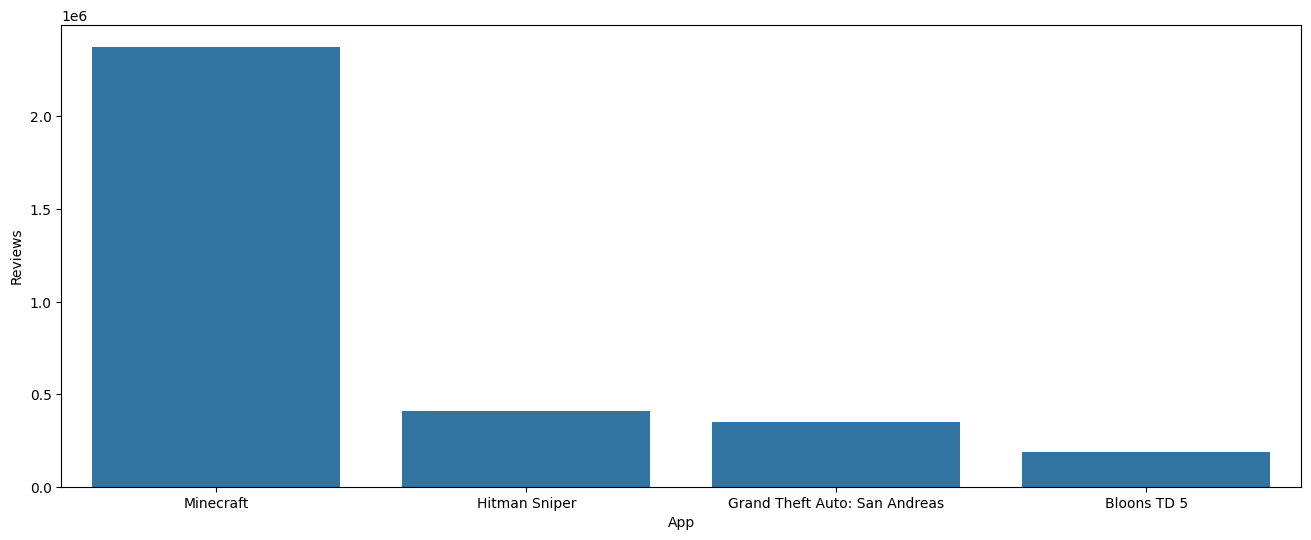

In [207]:
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

# **3.4. Which category Apps have the largest size in Mbs ?**

In [208]:
df.groupby("Category")["Size_in_Mb"].sum().sort_values(ascending= False).head(10)

Category
FAMILY                51880.450586
GAME                  45035.616016
MEDICAL                8518.749805
SPORTS                 7569.373633
TOOLS                  6481.277734
HEALTH_AND_FITNESS     6010.976562
BUSINESS               5788.750977
FINANCE                5503.991016
LIFESTYLE              5090.168359
TRAVEL_AND_LOCAL       4733.656836
Name: Size_in_Mb, dtype: float64

# **3.7. WHich `Genres` have how much `Installs` ?**

In [209]:
df.groupby("Genres")["Installs"].sum().sort_values(ascending= False).head(10)

Genres
Communication       32647276251
Productivity        14176091369
Social              14069867902
Tools               11442771915
Arcade              10727129155
Photography         10088247655
Casual               9662830740
Action               9342039190
News & Magazines     7496317760
Travel & Local       6868787146
Name: Installs, dtype: int64

In [210]:
df.dropna(inplace=True)

In [211]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size_in_bytes        0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Size_in_Mb           0
Installs_category    0
dtype: int64

In [212]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,medium_high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,very_high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,extremely_high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,top_notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,high


### **In order to make all the relevant features contribute more in training the model, we will create dummies of such features**

In [213]:
df_dummies = pd.get_dummies(df , columns=['Type' , 'Installs_category','Genres'])
df_dummies

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Price,Content Rating,Last Updated,Current Ver,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,0.0,Everyone,"January 7, 2018",1.0.0,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,0.0,Everyone,"January 15, 2018",2.0.0,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,0.0,Everyone,"August 1, 2018",1.2.4,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,0.0,Teen,"June 8, 2018",Varies with device,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,0.0,Everyone,"June 20, 2018",1.1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,633856.0,1000,0.0,Everyone,"March 23, 2014",0.8,...,False,False,False,False,False,False,False,False,False,False
10834,FR Calculator,FAMILY,4.0,7,2726297.6,500,0.0,Everyone,"June 18, 2017",1.0.0,...,False,False,False,False,False,False,False,False,False,False
10836,Sya9a Maroc - FR,FAMILY,4.5,38,55574528.0,5000,0.0,Everyone,"July 25, 2017",1.48,...,False,False,False,False,False,False,False,False,False,False
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3774873.6,100,0.0,Everyone,"July 6, 2018",1,...,False,False,False,False,False,False,False,False,False,False


In [214]:
df_dummies.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Price', 'Content Rating', 'Last Updated', 'Current Ver',
       ...
       'Genres_Strategy;Education', 'Genres_Tools', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=134)

In [215]:
X = df_dummies.drop(columns = ['App','Category','Content Rating','Last Updated','Current Ver','Android Ver'])
y = df_dummies["Content Rating"]

In [216]:
X_train , X_test , y_train , y_test = train_test_split(X , y,test_size=0.2 )

In [217]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [218]:
predection = model.predict(X_test)

In [219]:
predection = pd.DataFrame(predection)

In [220]:
predection = predection.rename(columns={0 : "predicted"})

In [221]:
y_test = pd.DataFrame(y_test)

In [222]:
y_test = y_test.reset_index(drop=True)

In [223]:
df_merage = X_test

In [224]:
df_merage = df_merage.reset_index(drop=True)

In [225]:
# df_merage['y_test'] = y_test
# df_merage['predection'] = predection
# df_merage

In [226]:
df_merage.to_csv('output.csv', index=False)

In [227]:
accuracy_score(y_test,predection)

0.8038834951456311